In [118]:
import pandas as pd
import os
import seaborn as sns

from sklearn.preprocessing import LabelEncoder


In [119]:
path_raw = os.getenv('PATH_RAW')
df = pd.read_csv('../data/scraped_data.csv', sep=',')
# df = pd.read_csv(path_raw, sep=',')

In [120]:
df_0 = df.copy()

In [121]:
df_0 = df_0.drop_duplicates()
df_0 = df_0.dropna()

df_0 = df_0[df_0['n_quartos'] != '5 ou mais']
df_0 = df_0[df_0['n_banheiros'] != '5 ou mais']
df_0 = df_0[df_0['n_garagens'] != '5 ou mais']

df_0 = df_0[(df_0['find_price'] > 200000) & (df_0['find_price'] < 1000000)]

C:\Users\Thamires\AppData\Local\Temp\ipykernel_9940\1173680375.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_0['find_price'])
C:\Users\Thamires\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='find_price', ylabel='Density'>

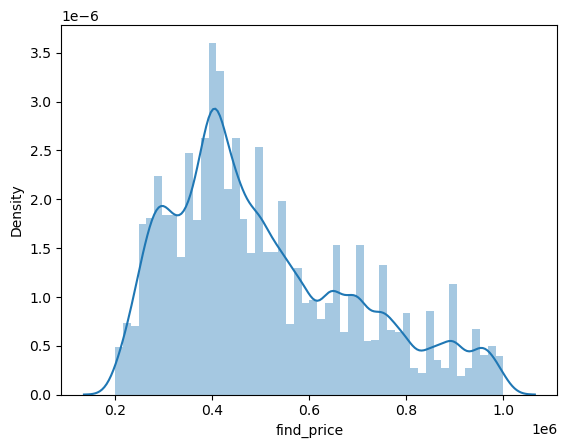

In [122]:
sns.distplot(df_0['find_price'])

In [123]:
df_0['expensive'] = df_0['find_price'].apply(lambda x: 1 if x>400000 else 0)

In [124]:
df_0['expensive'].value_counts(normalize=True)

expensive
1    0.642581
0    0.357419
Name: proportion, dtype: float64

In [125]:
df_0[['Bairro']] = df_0['find_endereco'].str.split(', ', expand=True)[[0]]

In [126]:
df_0 = df_0.drop(['find_anuncio','find_descri','find_loc','find_vendedor','find_endereco','is_ar_condicionado','is_profissional','n_fotos'], axis=1)

In [127]:
df_0.head(1)

,find_condominio,find_iptu,find_m_quadrado,find_price,is_academia,is_apertamento,is_churrasqueira,is_elevador,is_mobiliado,is_piscina,is_portaria,is_salao_festa,is_varanda,n_banheiros,n_garagens,n_quartos,expensive,Bairro
0,R$ 1.100 / mês,R$ 180,105m²,380000,False,True,False,False,False,False,False,False,False,3,0,3,0,Aflitos


In [128]:
# deixando como num a coluna find_condominio
df_0['find_condominio'] = df_0['find_condominio'].astype('str').str.replace('R$', '').str.replace(' / mês', '').str.replace('.', '')

# deixando como num a coluna find_iptu
df_0['find_iptu'] = df_0['find_iptu'].astype('str').str.replace('R$ ', '').str.replace('.', '')

# deixando como num a coluna find_m_quadrado
df_0['find_m_quadrado'] = df_0['find_m_quadrado'].astype('str').str.replace('m²', '').str.replace('.', '')

# cast direto colunas(floats devido a conseguir dar cast em NaN)
df_0['find_condominio'] = df_0['find_condominio'].astype('float')
df_0['find_iptu'] = df_0['find_iptu'].astype('float')
df_0['Bairro'] = df_0['Bairro'].astype('category')
df_0['find_m_quadrado'] = df_0['find_m_quadrado'].astype('float')
df_0['find_price'] = df_0['find_price'].astype('float')
df_0['is_academia'] = df_0['is_academia'].astype('int')
df_0['is_apertamento'] = df_0['is_apertamento'].astype('int')
#df_0['is_ar_condicionado'] = df_0['is_ar_condicionado'].astype('int')
df_0['is_churrasqueira'] = df_0['is_churrasqueira'].astype('int')
df_0['is_elevador'] = df_0['is_elevador'].astype('int')
df_0['is_mobiliado'] = df_0['is_mobiliado'].astype('int')
df_0['is_piscina'] = df_0['is_piscina'].astype('int')
df_0['is_portaria'] = df_0['is_portaria'].astype('int')
#df_0['is_profissional'] = df_0['is_profissional'].astype('int')
df_0['is_salao_festa'] = df_0['is_salao_festa'].astype('int')
df_0['is_varanda'] = df_0['is_varanda'].astype('int')
df_0['n_banheiros'] = df_0['n_banheiros'].astype('int')
#df_0['n_fotos'] = df_0['n_fotos'].astype('int')
df_0['n_garagens'] = df_0['n_garagens'].astype('int')
df_0['n_quartos'] = df_0['n_quartos'].astype('int')

In [129]:
df_0['Bairro'] = df_0['Bairro'].cat.codes

In [130]:
df_0 = df_0.drop(columns=['find_price'])

In [131]:
list(df_0.columns)

['find_condominio',
 'find_iptu',
 'find_m_quadrado',
 'is_academia',
 'is_apertamento',
 'is_churrasqueira',
 'is_elevador',
 'is_mobiliado',
 'is_piscina',
 'is_portaria',
 'is_salao_festa',
 'is_varanda',
 'n_banheiros',
 'n_garagens',
 'n_quartos',
 'expensive',
 'Bairro']

In [132]:
print(len(df_0))
for col in ['find_condominio', 'find_m_quadrado', 'find_iptu']:
    q1 = df_0[col].quantile(q=0.25)
    q3 = df_0[col].quantile(q=0.75)
    iqr = q3 - q1
    
    df_0 = df_0[(df_0[col] > (q1-1.5*iqr)) & (df_0[col] < (q3+1.5*iqr))]
print(len(df_0))

53461
42662


In [135]:
df_0 = df_0.sample(20000)

In [136]:
df_0.describe()

,find_condominio,find_iptu,find_m_quadrado,is_academia,is_apertamento,is_churrasqueira,is_elevador,is_mobiliado,is_piscina,is_portaria,is_salao_festa,is_varanda,n_banheiros,n_garagens,n_quartos,expensive,Bairro
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000
mean,328.807450,76.662250,68.030000,0.505250,0.985850,0.474700,0.729950,0.068150,0.694900,0.663950,0.670450,0.339650,1.599650,1.23065,2.353700,0.609150,34.191050
std,420.058745,119.621583,28.528314,0.499985,0.118112,0.499372,0.443996,0.252009,0.460461,0.472368,0.470062,0.473602,0.750399,0.46061,0.784045,0.487953,26.481044
min,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,47.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,2.000000,0.000000,10.000000
50%,1.000000,1.000000,62.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.00000,2.000000,1.000000,22.000000
75%,650.000000,149.000000,86.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.00000,3.000000,1.000000,54.000000
max,1850.000000,570.000000,152.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.00000,4.000000,1.000000,87.000000


In [137]:
!cd

C:\Users\Thamires\Desktop\Edu repos\interp-conf-ml\notebooks


In [138]:
df_0.to_csv('../data/to_split.csv')